In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import matplotlib as mpl

C:\Users\Dell\AppData\Local\Temp\ipykernel_7040\1772115832.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input and output directories
input_directory = "formatted_data"
output_directory = "cleaned_data"

# Create a folder for cleaned data
os.makedirs(output_directory, exist_ok=True)

# Function to detect and remove outliers using IQR
def remove_outliers(df, x_col, y_col):
    # Calculate Interquartile Range (IQR) for x and y columns
    Q1_x = df[x_col].quantile(0.25)
    Q3_x = df[x_col].quantile(0.75)
    IQR_x = Q3_x - Q1_x

    Q1_y = df[y_col].quantile(0.25)
    Q3_y = df[y_col].quantile(0.75)
    IQR_y = Q3_y - Q1_y

    # Define bounds for x and y
    lower_bound_x = Q1_x - 1.5 * IQR_x
    upper_bound_x = Q3_x + 1.5 * IQR_x

    lower_bound_y = Q1_y - 1.5 * IQR_y
    upper_bound_y = Q3_y + 1.5 * IQR_y

    # Filter data within the bounds
    filtered_df = df[(df[x_col] >= lower_bound_x) & (df[x_col] <= upper_bound_x) &
                     (df[y_col] >= lower_bound_y) & (df[y_col] <= upper_bound_y)]
    
    # Detect and remove isolated points and false peaks
    smoothed_y = filtered_df[y_col].rolling(window=5, center=True).mean()
    residuals = np.abs(filtered_df[y_col] - smoothed_y)
    residual_threshold = 1.5 * residuals.std()
    filtered_df = filtered_df[residuals <= residual_threshold]
    
    print(f"Data before filtering: {df.shape[0]} rows")
    print(f"Data after filtering: {filtered_df.shape[0]} rows")
    return filtered_df

# Process each file in the folder
for file_name in os.listdir(input_directory):
    if file_name.endswith(".csv"):
        file_path = os.path.join(input_directory, file_name)

        # Read the CSV file with the correct delimiter
        df = pd.read_csv(file_path, delimiter=';')

        # Ensure the relevant columns are numeric
        df['Acceleration voltage U_B / V'] = pd.to_numeric(df['Acceleration voltage U_B / V'], errors='coerce')
        df['Collector current I_A / nA'] = pd.to_numeric(df['Collector current I_A / nA'], errors='coerce')

        # Drop rows with NaN values in the relevant columns
        df = df.dropna(subset=['Acceleration voltage U_B / V', 'Collector current I_A / nA'])

        # Remove outliers
        cleaned_df = remove_outliers(df, 'Acceleration voltage U_B / V', 'Collector current I_A / nA')
        
        # Save the cleaned data
        cleaned_file_path = os.path.join(output_directory, file_name)
        cleaned_df.to_csv(cleaned_file_path, index=False)
        
        # Read all cleaned CSV data for verification
        df = pd.read_csv(cleaned_file_path)
        print(f"Processed file: {file_name}")
        print(df)

print("Data cleaning completed. Cleaned files is saved in the 'cleaned_data' folder.")

Data before filtering: 400 rows
Data after filtering: 362 rows
Processed file: 1.0 7.0 1.csv
     Time t / s  Voltage U_A1 / V  Voltage U_B1 / V  \
0         0.600             0.360             0.175   
1         0.700             0.375             0.205   
2         0.800             0.375             0.230   
3         0.900             0.390             0.260   
4         1.000             0.405             0.290   
..          ...               ...               ...   
357      39.300             0.915             7.905   
358      39.401             0.915             7.905   
359      39.500             0.915             7.905   
360      39.600             0.900             7.905   
361      39.700             0.900             7.905   

     Collector current I_A / nA  Acceleration voltage U_B / V  
0                         0.360                          1.75  
1                         0.375                          2.05  
2                         0.375                       

In [6]:
# Path ke folder data CSV
folder_path = 'cleaned_data/'  # Ganti dengan path folder yang benar
csv_files = ["1.5 7.0 1.csv", "1.5 7.0 2.csv", "1.5 7.0 3.csv",
             "1.0 7.0 1.csv", "1.0 7.0 2.csv", "1.0 7.0 3.csv",
             "2.0 7.0 1.csv", "2.0 7.0 2.csv", "2.0 7.0 3.csv",
             "1.5 6.0 1.csv", "1.5 6.0 2.csv", "1.5 6.0 3.csv",
             "1.5 8.0 1.csv", "1.5 8.0 2.csv", "1.5 8.0 3.csv"]

In [7]:
# function to remove value x in list "data"
def remove_value(data, x):
    return [value for value in data if value != x]

# function to find average of flat peak
def avg_peak(x, y, peak):
    flat_peak = [x[peak]]
    
    #check backward
    i=1
    while(y[peak-i] == y[peak]):
        flat_peak.append(x[peak-i])
        i+=1
    
    #check forward
    i=1
    while(y[peak+i] == y[peak]):
        flat_peak.append(x[peak+i])
        i+=1
    
    return sum(flat_peak)/len(flat_peak)

# adjust ylim for all
def adjust_ylim(variasi_ke, lim_var_1 = None, lim_var_2 = None, lim_var_3 = None, lim_var_4 = None, lim_var_5 = None, ax=None):
    if(ax==None):
        if(variasi_ke == 1 and lim_var_1 != None):
            plt.ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            plt.ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            plt.ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            plt.ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            plt.ylim(lim_var_5)
    else:
        if(variasi_ke == 1 and lim_var_1 != None):
            ax.set_ylim(lim_var_1)
        elif(variasi_ke == 2 and lim_var_2 != None):
            ax.set_ylim(lim_var_2)
        elif(variasi_ke == 3 and lim_var_3 != None):
            ax.set_ylim(lim_var_3)
        elif(variasi_ke == 4 and lim_var_4 != None):
            ax.set_ylim(lim_var_4)
        elif(variasi_ke == 5 and lim_var_5 != None):
            ax.set_ylim(lim_var_5)

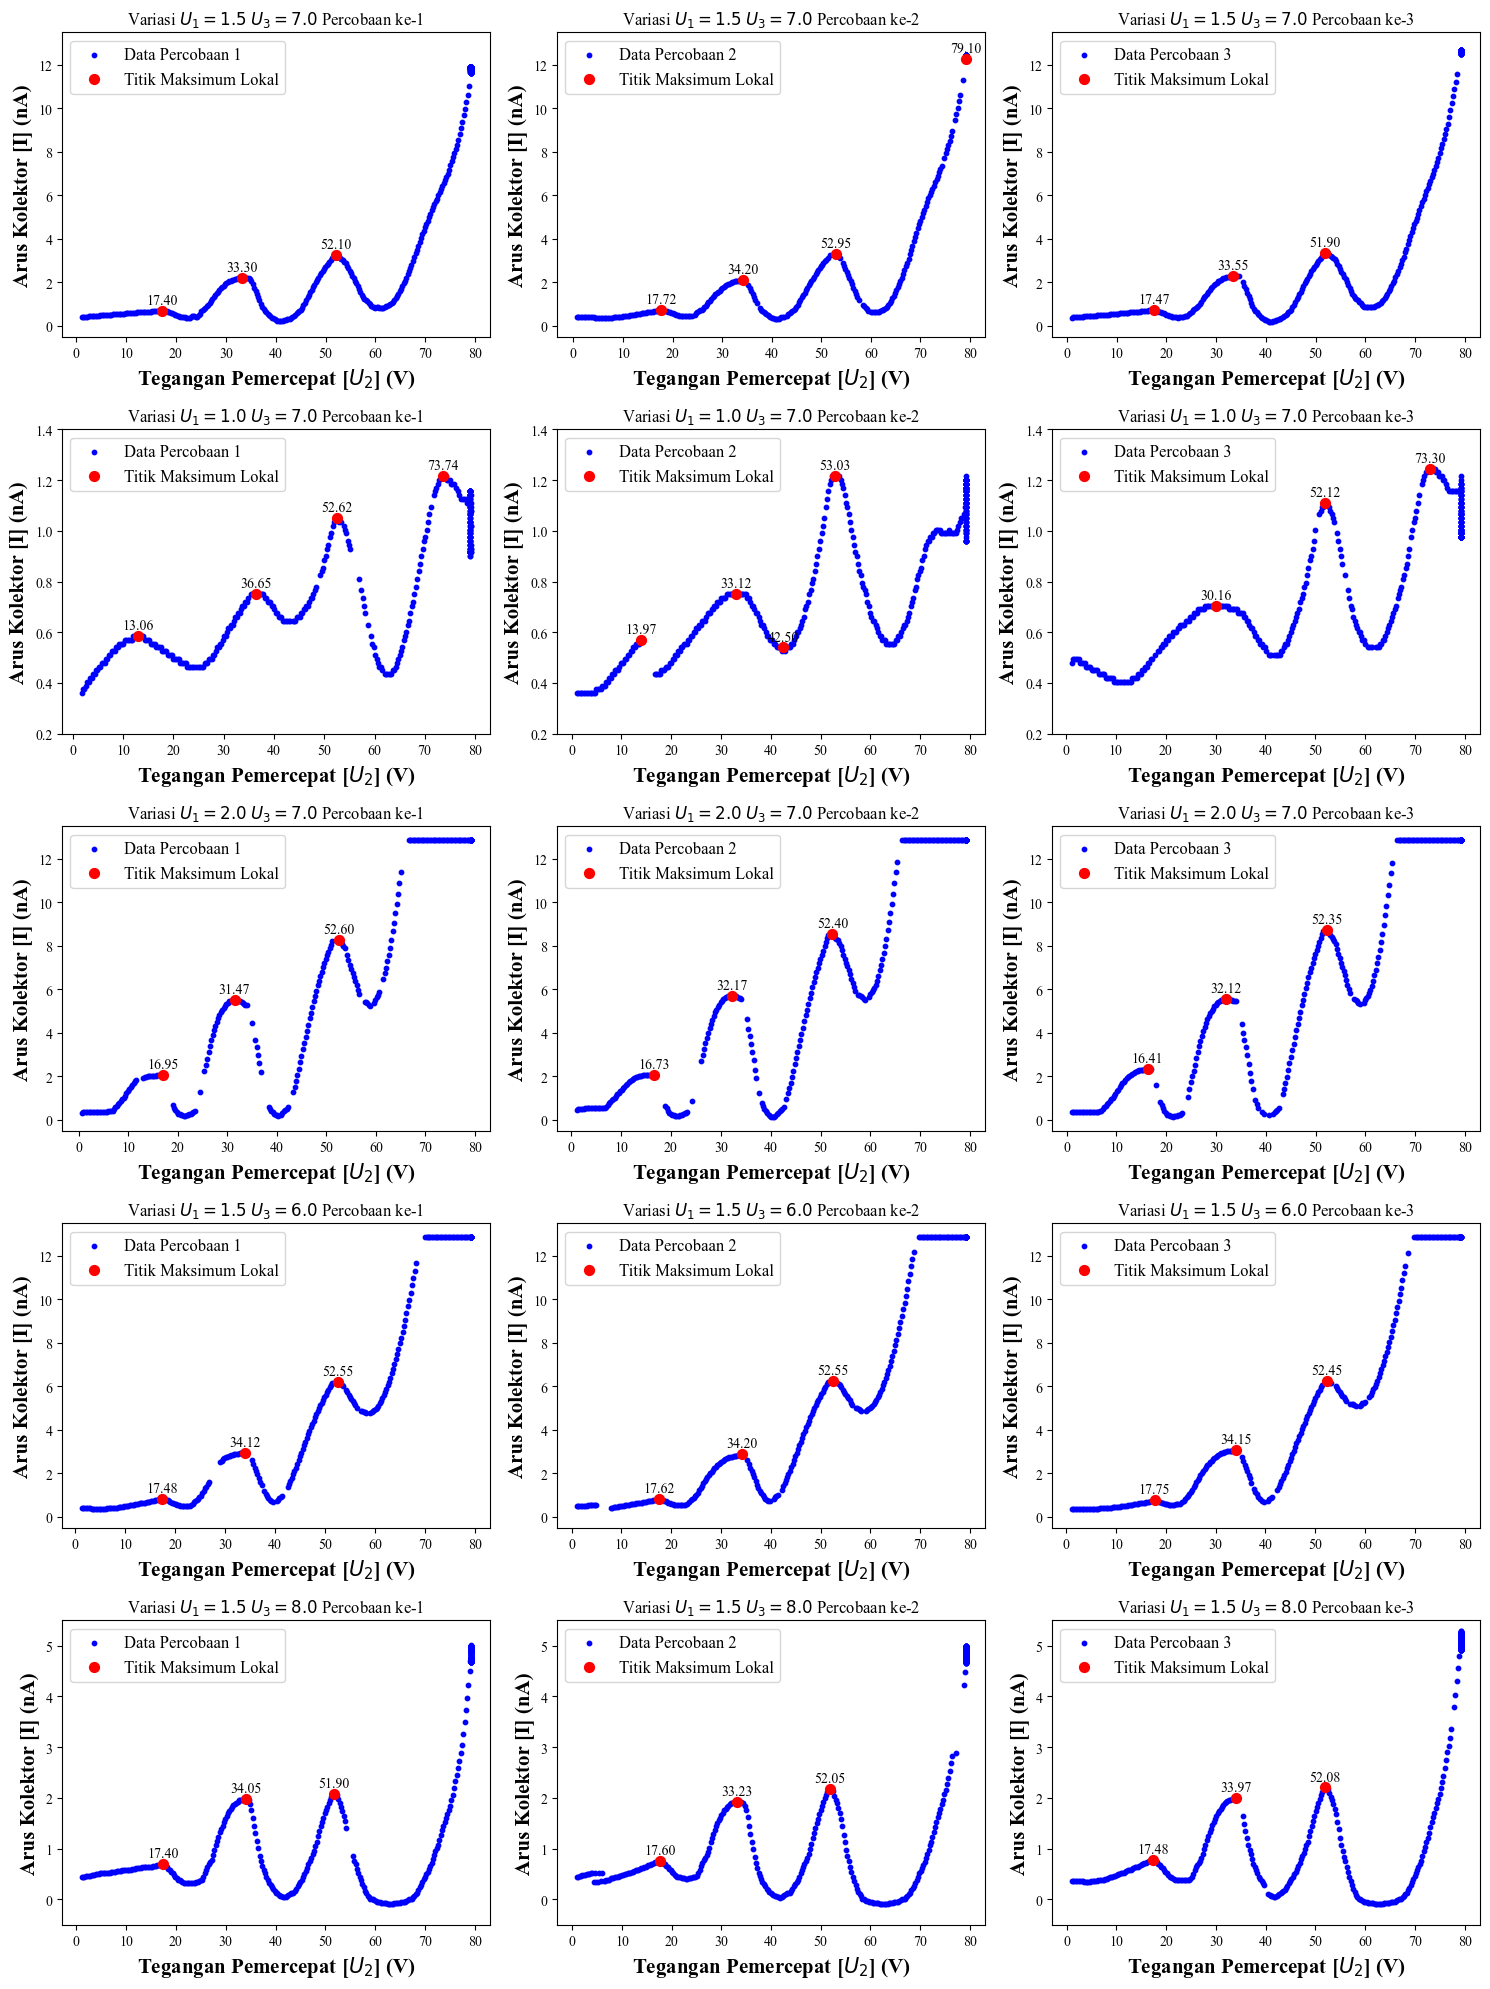

In [9]:
# gambaran semuanya

# Set up a figure with subplots
num_sheets = len(csv_files)  # Adjusts based on the actual number of sheets
n=0

# Set the font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'

# Set up a figure with 5x3 subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 20))  # Adjust size as needed
axes = axes.flatten()  # Flatten to simplify indexing

# matrix to store the peaks' U3
x_peak = [[[0 for _ in range(9)] for _ in range(3)] for _ in range(5)]

# Loop through each sheet
for i, csv_file in enumerate(csv_files[:15]):  
    n+=1 # grafik ke berapa
    variasi_ke = (n-1) // 3 + 1
    percobaan_ke = n % 3
    if(percobaan_ke == 0):
        percobaan_ke +=3

    # Load data from the current sheet
    file_path = os.path.join(folder_path, csv_file)
    data = pd.read_csv(file_path, sep=',')
    
    # Assuming 'x' and 'y' columns in each sheet
    x = data['Acceleration voltage U_B / V']
    y = data['Collector current I_A / nA']
    
    # Find local peaks in the y data
    peaks0, _ = find_peaks(y, distance=30)
    if(n==7): # fine tune graph ke4
        y_dummy = y.copy()
        y_dummy[:52] = [0 for i in range(52)]
        peaks0, _ = find_peaks(y_dummy, distance=30)

    # remove x lower than 10V, higher than 70V
    peaks1 = np.array(peaks0)
    threshold_x= 255
    peaks = peaks1[(peaks1 <= 274) & (peaks1 >=25)]
    if(n==4):
        peaks = peaks1[(peaks1 <= 255) & (peaks1 >=25)]
    # print(peaks)

    peaks2 = peaks.copy()
    ref = y[peaks[0]]
    for j in peaks:
        if(y[j]<ref):
            peaks2 = remove_value(peaks,j)
        
        else:
            ref= y[j]
    peaks = peaks2

    # Plot on the corresponding subplot
    ax = axes[i]
    # Scatter plot for the current sheet 
    # ax.figure(figsize=(10, 6))
    ax.scatter(x, y, color='blue', s=10, label=('Data Percobaan '+str(percobaan_ke)))
    ax.scatter(x[peaks], y[peaks], color='red', s=50, label='Titik Maksimum Lokal')
    
    # Annotate each peak with its x-coordinate
    peak_count = 0
    for peak in peaks:
        x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count] = avg_peak(x, y, peak)
        ax.annotate(f"{x_peak[variasi_ke - 1][percobaan_ke - 1][peak_count]:.2f}", (x[peak], y[peak]), textcoords="offset points", xytext=(0,5), ha='center')
        peak_count += 1
    
    # Set titles and labels for each subplot
    ax.set_xlabel('Tegangan Pemercepat [$U_{2}$] (V)', fontsize=15, fontweight='bold')
    ax.set_ylabel('Arus Kolektor [I] (nA)', fontsize=15, fontweight='bold')
    # ax.set_xticks(fontsize=12)
    # ax.set_yticks(fontsize=12)
    ax.legend(fontsize=12, loc='upper left')
    ax.set_title(f'Variasi $U_{1}={csv_file[0:3]}$ $U_{3}={csv_file[4:7]}$ Percobaan ke-{csv_file[8]}')
    adjust_ylim(variasi_ke, (-0.5,13.5), (0.2, 1.4), (-0.5, 13.5), (-0.5, 13.5), (-0.5, 5.5), ax)

    # Save the figure with high resolution
    # plt.savefig(f'figs/var{variasi_ke}/{csv_file}.png', dpi=300, bbox_inches='tight')  # Adjust dpi as needed

plt.tight_layout()
plt.show()